In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from biokit.viz import corrplot
import plotly.graph_objects as go

In [2]:
# functions
def plot_2D_cluster(data, agg, x_label, y_label, title='', centroid=False):
	fig = go.Figure()
	# add scatterplot
	fig.add_trace(go.Scatter(x = data[x_label], y = data[y_label],
					mode = 'markers',                      
					marker = dict(color = agg.labels_.astype(float)),
					text = agg.labels_))
	# configure title, labels and fonts
	fig.update_layout(
		title=title,
		xaxis_title=x_label,
		yaxis_title=y_label,
		font=dict(
			family="Lato, sans-serif",
			size=18
		)
	)
	if centroid:
		# get centroids
		centroids = pd.DataFrame(agg.cluster_centers_, columns = data.columns)
		# add centroids
		fig.add_trace(go.Scatter(x = centroids[x_label],
						y = centroids[y_label], 
						mode = 'markers',                  
						marker = dict(color = 'red', line=dict(color = 'Black', width=2) ),
						text = [0, 1])
		)
	fig.show()

def plot_3D_cluster(data, agg, x_label, y_label, z_label, title=''):
	# get centroids
	centroids = pd.DataFrame(agg.cluster_centers_, columns = data.columns)

	fig = go.Figure()
	# create 3D figure
	fig.add_trace(go.Scatter3d(x = data[x_label],
					y = data[y_label], z = data[z_label],
					mode = 'markers',                      
					marker = dict(color = agg.labels_.astype(float),
							size = 4),
					text = [0, 1, 2])
	)
	# configure title, labels and fonts
	fig.update_layout(scene = dict(
						xaxis_title = x_label,
						yaxis_title = y_label,
						zaxis_title = z_label),
					margin=dict(l=20, r=20, t=20, b=20),
					title=title,
					font=dict(
						family="Lato, sans-serif",
						size=12
		)
	)
	# add centroids
	fig.add_trace(go.Scatter3d(x = centroids[x_label],
					y = centroids[y_label], 
					z = centroids[z_label],
					mode = 'markers',                  
					marker = dict(color = 'red', line=dict(color = 'Black', width=2) ),
					text = [0, 1, 2])
	)
	fig.show()

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


### Descritive Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


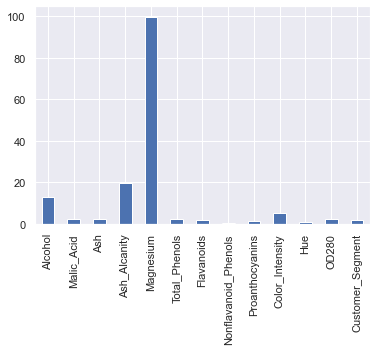

In [6]:
df.drop('Proline', axis=1).mean().plot(kind='bar');

<AxesSubplot:ylabel='Proline'>

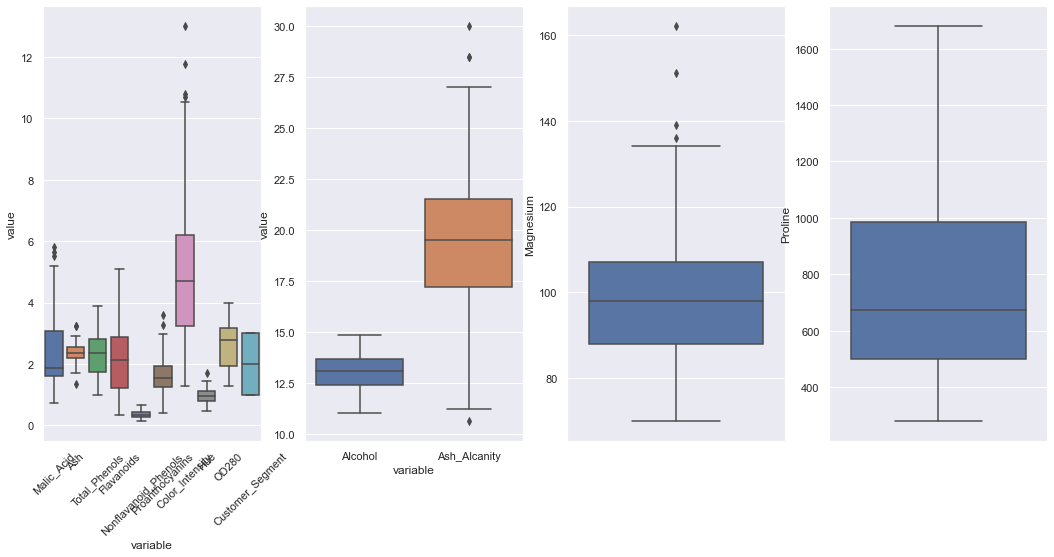

In [7]:
fig, ax = plt.subplots(1,4, figsize=(18,8))

sns.boxplot(data = pd.melt(df[[name for name,value in (df.mean() < 10).items() if value == True]]), x = 'variable', y = 'value', ax=ax[0])
ax[0].tick_params(axis='x', labelrotation = 45)

sns.boxplot(data = pd.melt(df[['Alcohol', 'Ash_Alcanity']]), x = 'variable', y = 'value', ax=ax[1])

sns.boxplot(data = df, y = 'Magnesium', ax=ax[2])

sns.boxplot(data = df, y = 'Proline', ax=ax[3])

/var/folders/_m/3m0bcc4n6h73gny0bt6_g4x80000gn/T/ipykernel_8426/2112716060.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


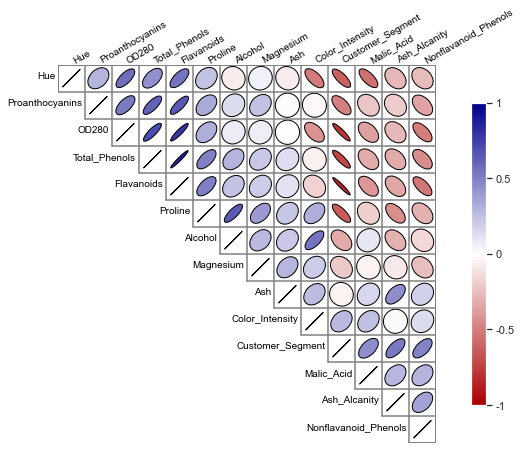

In [8]:
corr_graf = corrplot.Corrplot(df.corr())
corr_graf.plot(upper = 'ellipse')
fig = plt.gcf()
fig.set_size_inches(13,8)
fig.show()

### Normalizing Data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


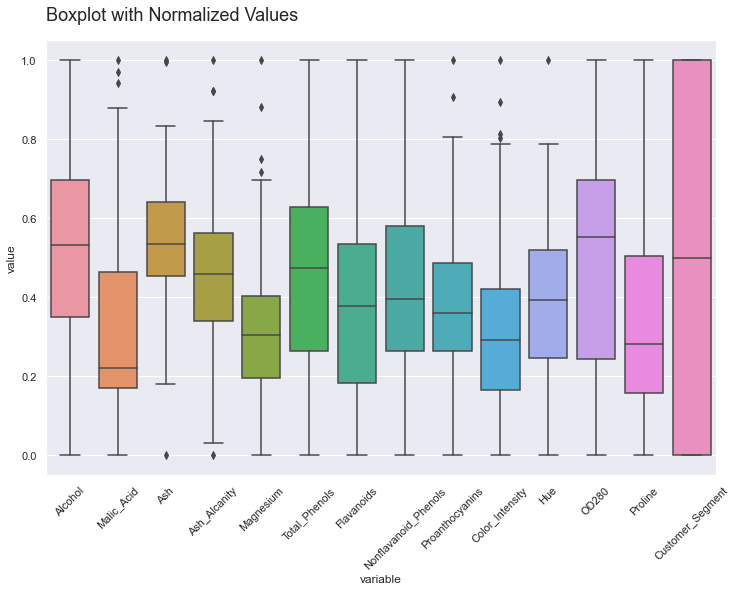

In [9]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler().fit_transform(df)
norm_df = pd.DataFrame(data = mms, columns = df.columns)

plt.figure(figsize=(12,8))
sns.boxplot(data = pd.melt(norm_df), x = 'variable', y = 'value')
plt.title('Boxplot with Normalized Values',size=18, loc='left', pad=20)
plt.xticks(rotation=45)

norm_df.head()

### K-Means Clustering

In [10]:
from sklearn.cluster import KMeans

# 4 clusters, one for each type of customer
kmeans_agg = KMeans(n_clusters = 4, random_state=42).fit(norm_df)
kmeans_agg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 3, 0,
       0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [11]:
plot_2D_cluster(data=df, agg=kmeans_agg, 
			x_label='Color_Intensity', y_label='Alcohol', 
			title=f'KMeans cluster n={kmeans_agg.n_clusters}')

In [12]:
plot_3D_cluster(norm_df, kmeans_agg, 'Color_Intensity', 'Alcohol', 'Proline')

### Clustering with DBSCAN

In [13]:
from sklearn.cluster import DBSCAN

dbscan_agg = DBSCAN(eps = 0.5, min_samples = 2, metric = 'euclidean').fit(norm_df)
dbscan_agg.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  1,  2,  2,  2,  2,  2,  2,
        1, -1, -1, -1,  2, -1, -1,  2,  2,  2, -1,  3,  2,  2,  2, -1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1,  2,  2, -1,  2,  2,
        2,  2,  2, -1,  2,  2,  2,  2, -1,  2,  2,  2,  2, -1,  2,  2, -1,
        2,  2, -1,  3, -1, -1,  2,  2, -1,  2,  2,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4])

In [14]:
plot_2D_cluster(data=df, agg=dbscan_agg, 
			x_label='Color_Intensity', y_label='Alcohol', 
			title=f'DBSCAN clustering eps={dbscan_agg.eps} min_samples={dbscan_agg.min_samples}')

### Clustering with MeanShift

In [15]:
from sklearn.cluster import MeanShift

meanshift_agg = MeanShift().fit(df)

meanshift_agg.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [16]:
plot_2D_cluster(data=df, agg=meanshift_agg, 
			x_label='Color_Intensity', y_label='Alcohol', 
			title=f'MeanShift clustering bw=None n_clusters={np.unique(meanshift_agg.labels_).size}')

In [17]:
from sklearn.cluster import estimate_bandwidth

bw = estimate_bandwidth(df, quantile=0.2)

meanshift_agg = MeanShift(bandwidth = bw).fit(df)

meanshift_agg.labels_

array([1, 1, 2, 3, 0, 3, 2, 2, 1, 1, 3, 2, 2, 2, 3, 2, 2, 2, 4, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 3, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0])

In [18]:
plot_2D_cluster(data=df, agg=meanshift_agg, 
			x_label='Color_Intensity', y_label='Alcohol', 
			title=f'MeanShift clustering bw={meanshift_agg.bandwidth:.2f} n_clusters={np.unique(meanshift_agg.labels_).size}',
			centroid=True)

In [19]:
bw = estimate_bandwidth(norm_df, quantile=0.2)
meanshift_agg = MeanShift(bandwidth = bw).fit(norm_df)
np.unique(meanshift_agg.labels_).size
plot_2D_cluster(data=norm_df, agg=meanshift_agg, 
			x_label='Color_Intensity', y_label='Alcohol', 
			title=f'Normalized data MeanShift clustering bw={meanshift_agg.bandwidth:.2f} n_clusters={np.unique(meanshift_agg.labels_).size}',
			centroid=True)

### Metrics

#### Example with KMeans

In [20]:
from sklearn.metrics import silhouette_score

In [107]:
silhouette_values = [silhouette_score(norm_df, KMeans(n_clusters=k, random_state=42).fit_predict(norm_df)) for k in range(2,11)]

fig = go.Figure()
fig.add_trace(go.Scatter(x = [i for i in range(2,11)],
                         y = silhouette_values)
)
fig.update_layout(dict(title = 'KMeans Silhouette values',
				xaxis_title = 'N Clusters',
                       	yaxis_title='Silhouette score')
)

#### Example with Mean Shift

In [108]:
silhouette_values = []
for quantile in np.linspace(0.02, 0.5, 30):
	bw = estimate_bandwidth(X=norm_df, quantile=quantile)
	agg = MeanShift(bandwidth=bw).fit(norm_df)
	try:
		score = silhouette_score(norm_df, agg.predict(norm_df))
		silhouette_values.append([score, quantile])
	except ValueError:
		silhouette_values.append([0, quantile])

silhouette_values_df = pd.DataFrame(silhouette_values, columns=['score','quantile'])

fig = go.Figure()
fig.add_trace(go.Scatter(x = silhouette_values_df['quantile'],
                         y = silhouette_values_df['score'])
)
fig.update_layout(dict(title = 'Mean Shift Silhouette values',
				xaxis_title = 'Quantile',
                       	yaxis_title='Silhouette score')
)
fig.show()

### Example with DBSCAN

In [146]:
eps_range = np.linspace(0.1, 1, 20)
min_samples_range = np.arange(1,100)
silhouette_values = []

for metric in ['manhattan', 'euclidean']:
	for eps in eps_range:
		for min_samples in min_samples_range:
			predict = DBSCAN(eps=eps, min_samples=min_samples, metric=metric).fit_predict(norm_df)
			try:
				score = silhouette_score(norm_df, predict)
				silhouette_values.append([score, eps, min_samples, metric])
			except ValueError:
				silhouette_values.append([0, eps, min_samples, metric])

dbscan_score_values = pd.DataFrame(silhouette_values, columns=['score','eps','min_samples', 'metric'])

"""fig = go.Figure()
fig.add_trace(go.Scatter3d(x = silhouette_values_df['eps'],
                        	y = silhouette_values_df['min_samples'],
							z = silhouette_values_df['score'],
							mode = 'markers',                      
							marker = dict(color = predict.astype(float), size = 4),
							text = [0,1,2])
)
fig.update_layout(scene = dict(
						xaxis_title = 'eps',
						yaxis_title = 'min_samples',
						zaxis_title = 'Silhouette score'),
					margin=dict(l=20, r=20, t=20, b=20),
					title='DBSCAN Silhouette values',
					font=dict(
						family="Lato, sans-serif",
						size=12)
)
fig.show()"""

'fig = go.Figure()\nfig.add_trace(go.Scatter3d(x = silhouette_values_df[\'eps\'],\n                        \ty = silhouette_values_df[\'min_samples\'],\n\t\t\t\t\t\t\tz = silhouette_values_df[\'score\'],\n\t\t\t\t\t\t\tmode = \'markers\',                      \n\t\t\t\t\t\t\tmarker = dict(color = predict.astype(float), size = 4),\n\t\t\t\t\t\t\ttext = [0,1,2])\n)\nfig.update_layout(scene = dict(\n\t\t\t\t\t\txaxis_title = \'eps\',\n\t\t\t\t\t\tyaxis_title = \'min_samples\',\n\t\t\t\t\t\tzaxis_title = \'Silhouette score\'),\n\t\t\t\t\tmargin=dict(l=20, r=20, t=20, b=20),\n\t\t\t\t\ttitle=\'DBSCAN Silhouette values\',\n\t\t\t\t\tfont=dict(\n\t\t\t\t\t\tfamily="Lato, sans-serif",\n\t\t\t\t\t\tsize=12)\n)\nfig.show()'

,score,eps,min_samples,metric
3072,0.359402,0.621053,4,euclidean


#### Comparing metrics results

In [ ]:
dbscan_best_params = dbscan_score_values[dbscan_score_values['score'] == dbscan_score_values['score'].max()]
dbscan_best_params

In [184]:
kmeans_agg = KMeans(n_clusters=3, random_state=42).fit(norm_df)
dbscan_agg = DBSCAN(**dbscan_best_params.drop('score', axis=1).reset_index(drop=True).to_dict('index')[0]).fit(norm_df)
bw = estimate_bandwidth(norm_df, quantile=0.2186207)
meanshift_agg = MeanShift(bandwidth=bw).fit(norm_df)

In [186]:
print("K-means Silhouette Score:", silhouette_score(norm_df, kmeans_agg.labels_))
print("DBSCAN Silhouette Score: ", silhouette_score(norm_df,dbscan_agg.labels_))
print("MeanShift Silhouette Score: ", silhouette_score(norm_df, meanshift_agg.labels_))

K-means Silhouette Score: 0.36950618492736303
DBSCAN Silhouette Score:  0.3594021095823988
MeanShift Silhouette Score:  0.34353173543532023
